# Лабораторная работа по заданию № 1 “Эмпирический анализ временной сложности алгоритмов” 

In [24]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

In [50]:
const_time_list=[]
summ_time_list=[]
pr_time_list=[]
native_time_list=[]
gorner_time_list=[]
qs_time_list=[]
timsort_time_list=[]
bubble_time_list=[]

for i in range (1, 2000):
    random_value=random.uniform(0, 0.000000010)
    array=np.random.random_sample((i))
    #print("Итерация: "+str(i))
    
    #Константа
    
    #print('const')
    res_time=0
    for t in range(5):
        start_time = time.time()
        f=5
        current_time=time.time() - start_time
        #print("Current time: "+str('{:0.9f}'.format(current_time)))
        res_time=res_time+current_time
    const_time_list.append(res_time/5)
    #print("Mean time: "+'{:0.9f}'.format(res_time/5))
    
    #Сумма 
    
    #print('Summ')
    res_time=0
    for t in range(5):
        start_time = time.time()
        summ=0
        for el in array:
            summ=summ+el
        #print("Сумма:"+str(summ)) 
        current_time=time.time() - start_time
        #print("Current time: "+str('{:0.9f}'.format(current_time)))
        res_time=res_time+current_time
    summ_time_list.append(res_time/5)
    #print("Mean time: "+'{:0.9f}'.format(res_time/5))
    
    #Произведение
    
    #print('product')
    res_time=0
    for t in range(5):
        start_time = time.time()
        res=1
        for el in array:
            res=res*el
        #print("Произведение: "+str(res))
        current_time=time.time() - start_time
        #print("Current time: "+str('{:0.9f}'.format(current_time)))
        res_time=res_time+current_time
    pr_time_list.append(res_time/5)
    #print("Mean time: "+'{:0.9f}'.format(res_time/5))
    
     
    #Расчет значения многочлена (каждый элемент - коэфф. многочлена)
    
    #print('polynomial')
    res_time=0
    res_time2=0
    for i in range (5):
        start_time = time.time()
        new_res=0
        for j in range (1, len(array)+1):
            temp=1
            for t in range(j-1):
                temp=temp*1.5
            new_res=new_res+array[j-1]*temp
        #print("Прямой метод:")
        #print(new_res)
        res_time=res_time+float('{:0.9f}'.format(time.time() - start_time))

        start_time = time.time()
        n=len(array)-1
        if n!=0 and n!=1:
            res=1.5*array[n]+array[n-1]
            for k in list(reversed(range(len(array)-2))):
                res=(array[k]+1.5*res)            
        if n==0:
            res=array[0]
        if n==1:
            res=array[1]*1.5+array[0]
        #print("Горнер метод:")
        #print(res)
        res_time2=res_time2+float('{:0.9f}'.format(time.time() - start_time))
    #print("Прямой метод:")
    native_time_list.append(res_time/5)
    #print('{:0.9f}'.format(res_time/5))
    #print("Горнер метод:")
    gorner_time_list.append(res_time2/5)
    #print("Mean time: "+'{:0.9f}'.format(res_time2/5))    
         
    #quicksort
    
    #print('quicksort')
    def quick_sort(array_copy):
        less = []
        equal = []
        greater = []
        if len(array_copy) > 1:
            center = array_copy[0]
            for x in array_copy:
                if x < center:
                    less.append(x)
                elif x == center:
                    equal.append(x)
                elif x > center:
                    greater.append(x)
            return quick_sort(less)+equal+quick_sort(greater)
        else: 
            return array_copy
    
    res_time=0
    for t in range(5):
        start_time = time.time()
        array_copy=np.copy(array)
        
        quick_sort(array_copy)        
       
        current_time=time.time() - start_time
        #print("Current time: "+str('{:0.9f}'.format(current_time)))
        array_copy=None
        res_time=res_time+current_time
    qs_time_list.append(res_time/5)
    #print("Mean time: "+'{:0.9f}'.format(res_time/5))     
        
        
    #timsort - стандартный для python    
    
    #print('timsort')
    res_time=0
    for t in range(5):
        start_time = time.time()
        result=sorted(array)
        current_time=time.time() - start_time
        #print("Current time: "+str('{:0.9f}'.format(current_time)))
        res_time=res_time+current_time
    timsort_time_list.append(res_time/5)
    #print("Mean time: "+'{:0.9f}'.format(res_time/5))
    
    
    #сортировка пузырьком
    
    #print('bubble sort')
    res_time=0
    for t in range(5):
        start_time = time.time()
        array_copy=np.copy(array)
        length = len(array_copy) - 1
        finished = False
        while not finished:
            finished = True
            for i in range(length):
                if array_copy[i] > array_copy[i+1]:
                    finished = False
                    array_copy[i], array_copy[i+1] = array_copy[i+1], array_copy[i]
        current_time=time.time() - start_time
        #print("Current time: "+str('{:0.9f}'.format(current_time)))
        array_copy=None
        res_time=res_time+current_time
    bubble_time_list.append(res_time/5)
    #print("Mean time: "+'{:0.9f}'.format(res_time/5))        

   

KeyboardInterrupt: 

Запись статистики в файл на случай если графики не получатся с первого раза

In [26]:
with open('./SPEED_STATISTICS.txt', 'w') as writer:
    writer.write("const_time_list:\n"+str(const_time_list)+'\n')
    writer.write("summ_time_list:\n"+str(summ_time_list)+'\n')
    writer.write("pr_time_list:\n"+str(pr_time_list)+'\n')
    writer.write("native_time_list:\n"+str(native_time_list)+'\n')
    writer.write("gorner_time_list:\n"+str(gorner_time_list)+'\n')
    writer.write("qs_time_list:\n"+str(qs_time_list)+'\n')
    writer.write("timsort_time_list:\n"+str(timsort_time_list)+'\n')
    writer.write("bubble_time_list:\n"+str(bubble_time_list)+'\n')
    writer.write("matrix_time_list:\n"+str(matrix_time_list)+'\n')

## Суммирование элементов 

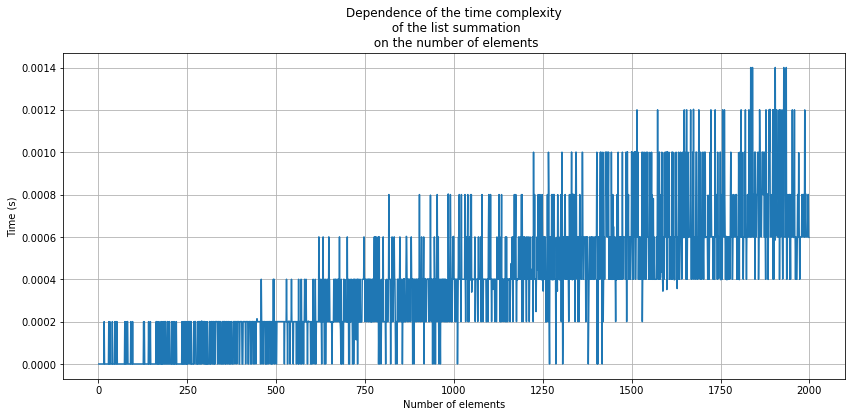

In [27]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, Запись статистики в файл на случай если графики не получатся с первого раза, 1)
ax.plot(t, summ_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of the list summation\n on the number of elements')
ax.grid()
plt.show()

## Постоянная

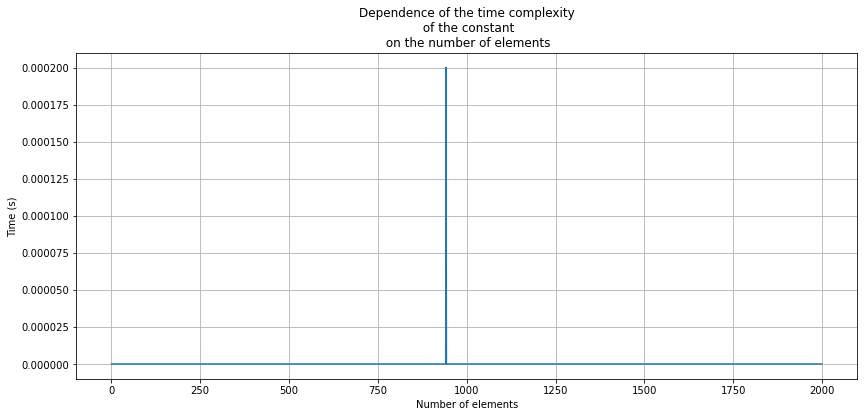

In [28]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 2000, 1)
ax.plot(t, const_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of the constant\n on the number of elements')
ax.grid()
plt.show()

## Произведение элементов 

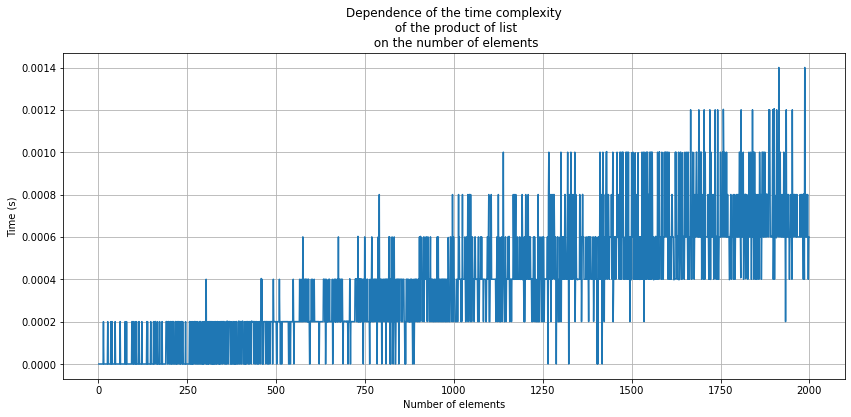

In [29]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 2000, 1)
ax.plot(t, pr_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of the product of list\n on the number of elements')
ax.grid()
plt.show()

## Поиск значения многочлена (прямой метод)

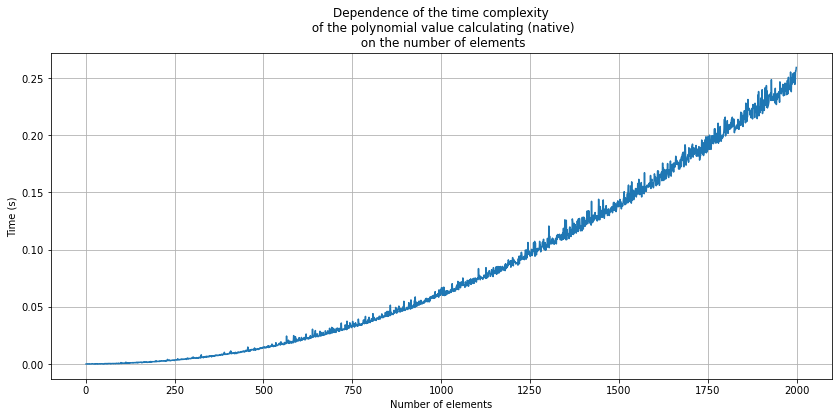

In [30]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 2000, 1)
ax.plot(t, native_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of the polynomial value calculating (native)\n on the number of elements')
ax.grid()
plt.show()

## Поиск значения многочлена (метод Горнера)

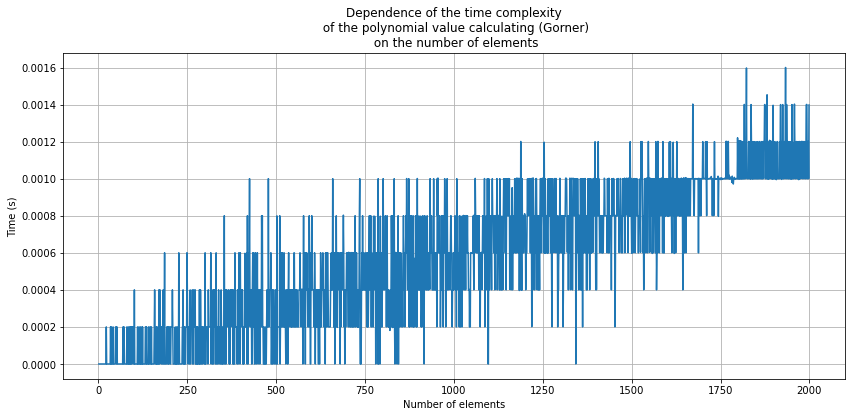

In [31]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 2000, 1)
ax.plot(t, gorner_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of the polynomial value calculating (Gorner)\n on the number of elements')
ax.grid()
plt.show()

## Быстрая сортировка

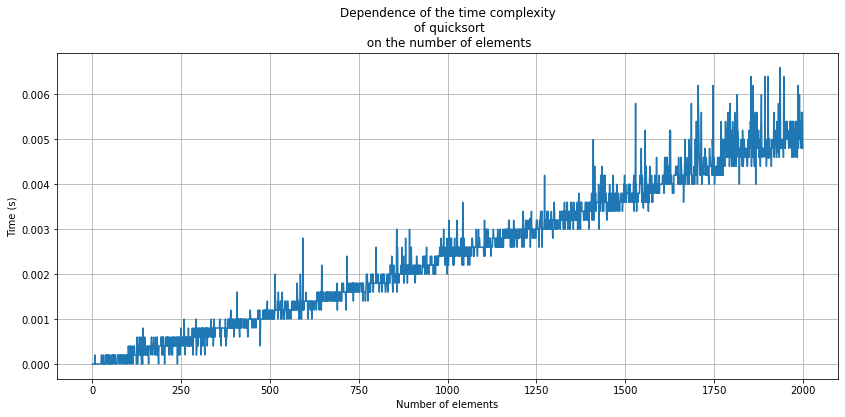

In [32]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 2000, 1)
ax.plot(t, qs_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of quicksort\n on the number of elements')
ax.grid()
plt.show()

## Гибридная сортировка 

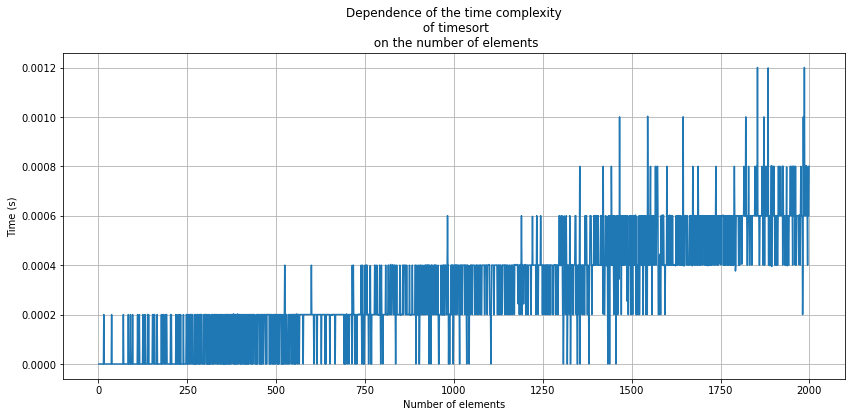

In [33]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 2000, 1)
ax.plot(t, timsort_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of timesort\n on the number of elements')
ax.grid()
plt.show()

## Сортировка пузырьком 

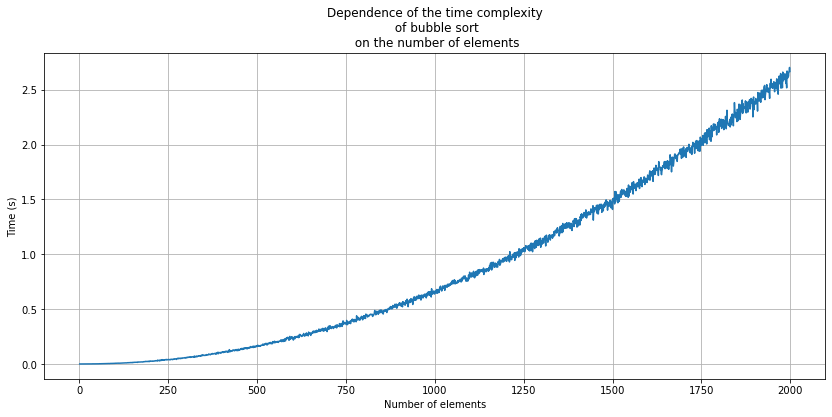

In [34]:
plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 2000, 1)
ax.plot(t, bubble_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of bubble sort\n on the number of elements')
ax.grid()
plt.show()

## Прямое перемножение матриц 

Для 2000 итераций перемножение матриц работало бы слишком долго, вынесла в отдельный цикл и сократила верхнюю планку входных данных до n=400

In [51]:
matrix_time_list=[]
for i in range (1, 400):
    random_value=random.uniform(0, 0.000000010)
    array=np.random.random_sample((i))
    #print("Итерация: "+str(i))
    matrix_A=np.random.rand(i,i)
    matrix_B=np.random.rand(i,i)
    
    res_time=0
    for t in range(5):
        start_time = time.time()
        summ=0     #сумма
        temp_m=[]    #временная матрица
        result_m=[] # конечная матрица
        for z in range(0,i):
            for j in range(0,i):
                for h in range(0,i):
                   summ=summ+matrix_A[z][h]*matrix_B[h][j]
                temp_m.append(summ)
                summ=0
            result_m.append(temp_m)
            temp_m=[]   
        #print(Результат перемножения:)
        #print(np.array(result_m))
        current_time=time.time() - start_time
        #print("Current time: "+str('{:0.9f}'.format(current_time)))
        array_copy=None
        res_time=res_time+current_time
    matrix_time_list.append(res_time/5)
    #print("Mean time: "+'{:0.9f}'.format(res_time/5))
    
    #Запись в файл на случай провальных графиков
    with open('./SPEED_MATRIX_STATISTICS_400.txt', 'w') as writer:
        writer.write("matrix_time_list:\n"+str(matrix_time_list)+'\n')
    

KeyboardInterrupt: 

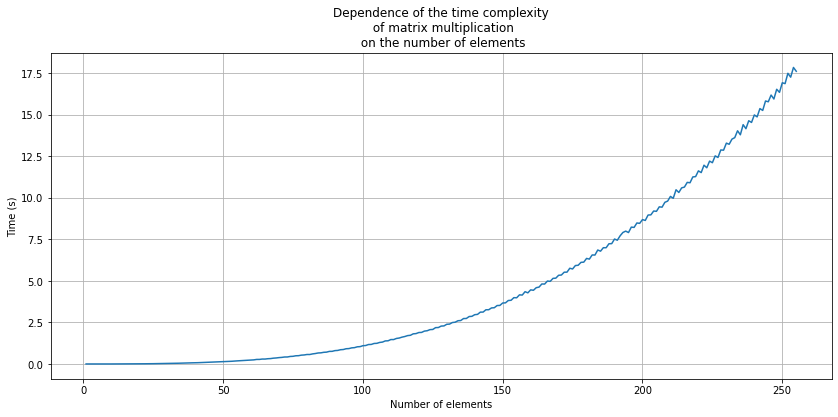

In [44]:
#Уж очень долго считалось для 400 итераций, остановила процесс, взяла данные о времени из файла
matrix_time_list=[0.0006000995635986328, 0.0, 0.00020012855529785156, 0.00020165443420410155, 0.0, 0.00019998550415039061, 0.0004001617431640625, 0.0006000995635986328, 0.0010001182556152344, 0.001000356674194336, 0.0016004085540771485, 0.0022006988525390624, 0.002600574493408203, 0.0030007362365722656, 0.0036016464233398437, 0.004602575302124023, 0.005401134490966797, 0.006400632858276367, 0.008599328994750976, 0.009004592895507812, 0.010202121734619141, 0.011802768707275391, 0.015606164932250977, 0.015203428268432618, 0.017404699325561525, 0.019807100296020508, 0.022002315521240233, 0.02620835304260254, 0.032407283782958984, 0.030606937408447266, 0.03400497436523438, 0.036810779571533205, 0.0422119140625, 0.04481239318847656, 0.05101146697998047, 0.060013532638549805, 0.05821547508239746, 0.06461200714111329, 0.06921548843383789, 0.07061338424682617, 0.0772172451019287, 0.08402175903320312, 0.08861994743347168, 0.09981980323791503, 0.09962477684020996, 0.10822501182556152, 0.11342544555664062, 0.12463040351867676, 0.13142623901367187, 0.13903360366821288, 0.14843325614929198, 0.15783543586730958, 0.1618335247039795, 0.1758420467376709, 0.18604164123535155, 0.19701728820800782, 0.20624899864196777, 0.22045207023620605, 0.22545318603515624, 0.23805341720581055, 0.2470554828643799, 0.27334132194519045, 0.2740641593933105, 0.2964691162109375, 0.29546365737915037, 0.3160707473754883, 0.3250729084014893, 0.34948277473449707, 0.36208128929138184, 0.3830862045288086, 0.3962890148162842, 0.4198940277099609, 0.42109456062316897, 0.45270161628723143, 0.4617035388946533, 0.4933107852935791, 0.4993121147155762, 0.5319194316864013, 0.5429219245910645, 0.5711281776428223, 0.5699308395385743, 0.6065334796905517, 0.6291419982910156, 0.6623510360717774, 0.671153450012207, 0.7025551319122314, 0.7127625942230225, 0.7573672294616699, 0.7605707168579101, 0.8041831016540527, 0.8161831855773926, 0.8581899642944336, 0.8701954364776612, 0.9170655727386474, 0.926808214187622, 0.9702754497528077, 0.9832207679748535, 1.033852481842041, 1.0442349910736084, 1.0996443271636962, 1.1118524551391602, 1.17106294631958, 1.177066707611084, 1.2344747066497803, 1.2436818122863769, 1.2968276023864747, 1.3177407264709473, 1.387711238861084, 1.3955133438110352, 1.4705327987670898, 1.4699355125427247, 1.5371460914611816, 1.562189769744873, 1.616331195831299, 1.6531708717346192, 1.7083832263946532, 1.7263904094696045, 1.8148091793060304, 1.8290162563323975, 1.8932268619537354, 1.9010271549224853, 1.9794468402862548, 2.001578950881958, 2.0682668685913086, 2.078669548034668, 2.188494253158569, 2.1950522899627685, 2.2818974018096925, 2.2922272205352785, 2.3905389308929443, 2.4015425205230714, 2.4957605838775634, 2.515167474746704, 2.603784942626953, 2.61638503074646, 2.735814428329468, 2.7394153118133544, 2.85643630027771, 2.8700101375579834, 2.9682313919067385, 2.986473560333252, 3.121584939956665, 3.1251039505004883, 3.264091968536377, 3.266509675979614, 3.374822235107422, 3.387649488449097, 3.5179901123046875, 3.5259894847869875, 3.6712247848510744, 3.681026887893677, 3.821458435058594, 3.835661506652832, 3.994297218322754, 3.985895204544067, 4.16211895942688, 4.150132322311402, 4.352577543258667, 4.284162378311157, 4.4628044128417965, 4.438197422027588, 4.594584226608276, 4.630040073394776, 4.817676830291748, 4.812481212615967, 4.995198059082031, 4.9759214401245115, 5.155163049697876, 5.168163394927978, 5.340402317047119, 5.357091617584229, 5.526768064498901, 5.529748773574829, 5.764189434051514, 5.721089029312134, 5.926748991012573, 5.945141983032227, 6.119000816345215, 6.1324317932128904, 6.3557757377624515, 6.3154213428497314, 6.564150047302246, 6.560023784637451, 6.862542295455933, 6.7927258014678955, 7.001973104476929, 6.999972629547119, 7.238425970077515, 7.247027826309204, 7.5236900806427, 7.452674007415771, 7.718133544921875, 7.91917872428894, 8.000196886062621, 7.914590501785279, 8.240468978881836, 8.224629735946655, 8.490716695785522, 8.46832342147827, 8.694581460952758, 8.643626689910889, 8.969035577774047, 8.979820013046265, 9.21079912185669, 9.193579626083373, 9.461975002288819, 9.44315047264099, 9.734812259674072, 9.80903663635254, 10.090276861190796, 9.97804913520813, 10.490848779678345, 10.327780866622925, 10.603253030776978, 10.652688789367676, 10.933860683441162, 10.913754796981811, 11.263132476806641, 11.28310718536377, 11.62826771736145, 11.5259578704834, 11.970274066925048, 11.816079044342041, 12.215794610977174, 12.120643281936646, 12.530934047698974, 12.436427116394043, 12.886891555786132, 12.875110244750976, 13.298410129547118, 13.23097472190857, 13.539678907394409, 13.630104780197144, 14.043578910827637, 13.801937532424926, 14.409662961959839, 14.168794012069702, 14.646892213821411, 14.545270013809205, 14.996444702148438, 14.87974500656128, 15.378719854354859, 15.268281030654908, 15.836211585998536, 15.790746879577636, 16.194611740112304, 15.957184791564941, 16.543318700790405, 16.356475400924683, 16.933606386184692, 16.882572507858278, 17.503636264801024, 17.271980810165406, 17.855698680877687, 17.625359296798706]

plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
t = np.arange(1, 256, 1)
ax.plot(t, matrix_time_list)
ax.set(xlabel='Number of elements', ylabel='Time (s)',title='Dependence of the time complexity\n of matrix multiplication\n on the number of elements')
ax.grid()
plt.show()